## Question 1:

Implement the KNN classifier.

Your implementation should accept two data files as input (both are posted with the assignment): a spam train.csv file (weka spam train.arff for Weka users) and a spam test.csv file (weka spam test.arff for Weka users). Both files contain exam- ples of e-mail messages, with each example having a class label of either “1” (spam) or “0” (no-spam). Each example has 57 (numeric) features that characterize the message. Your classifier should examine each example in the spam test set and classify it as one of the two classes. The classification will be based on an unweighted vote of its k nearest examples in the spam train set. We will measure all distances using regular Euclidean distance:

In [2]:
import pandas as pd

spam_train = pd.read_csv('Desktop/code/CISC6930_DM/data/spam_train.csv')
spam_train.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f49,f50,f51,f52,f53,f54,f55,f56,f57,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
spam_test = pd.read_csv('Desktop/code/CISC6930_DM/data/spam_test.csv')
spam_test.head()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f49,f50,f51,f52,f53,f54,f55,f56,f57,Label
0,t1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.50,0.00,...,0.000,0.182,0.0,0.000,0.182,0.000,3.545,21,78,1
1,t2,0.31,0.00,0.63,1.91,0.21,0.00,0.00,0.00,0.42,...,0.000,0.169,0.0,0.358,0.188,0.075,2.847,75,447,1
2,t3,0.00,0.75,0.37,0.00,0.00,0.00,0.75,0.00,0.00,...,0.000,0.000,0.0,0.242,0.000,0.145,9.584,332,508,1
3,t4,0.00,1.96,0.98,0.00,0.00,0.00,1.96,0.00,0.00,...,0.000,0.168,0.0,1.011,0.000,0.000,2.888,12,52,1
4,t5,0.51,0.43,0.29,0.00,0.14,0.03,0.00,0.18,0.54,...,0.012,0.080,0.0,0.454,0.523,0.136,6.590,739,2333,1


In [4]:
import numpy as np 

# create design matrix X and target vector y
X_train = np.array(spam_train.iloc[:, 0:56])
y_train = np.array(spam_train['class'])

X_test = np.array(spam_test.iloc[:, 1:57])
y_test = np.array(spam_test['Label'])

### (a) 

Report test accuracies when k=1,5,11,21,41,61,81,101,201,401 without normalizing the features.

In [5]:
# Training method: memorizing the training data
def train(X_train, y_train):
    # do nothing
    return

In [6]:
# prediction method: compute the euclidean distance, then select the K nearest ones
# then perform majority vote
# then assign the labels to instances

from collections import Counter
from sklearn.metrics import accuracy_score

def predict(X_train, y_train, X_test, k):
    # create list for distances and targets
    distances = []
    targets = []
    
    for i in range(len(X_train)):
        # first compute the euclidean distance
        distance = np.sqrt(np.sum(np.square(X_test - X_train[i, :])))
        # add it to the list of distances
        distances.append([distance, i])
    
    # sort the list
    distances = sorted(distances)
    
    # make a list of k neighbors' targets
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])
    
    # return most common target: majority vote 
    return Counter(targets).most_common(1)[0][0]


In [9]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    # check if k larger than n
    if k > len(X_train):
        raise ValueError
    
    # train on the input data
    train(X_train, y_train)
    
    # predict for each testing observation 
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

# make predictions
predictions = []
try:
        kNearestNeighbor(X_train, y_train, X_test, predictions, 1)
        predictions = np.asarray(predictions)
        
        # evaluating accuracy 
        accuracy = accuracy_score(y_test, predictions) * 100
        print('\nThe accuracy of Our classifier is %d%%' % accuracy)
        
except ValueError:
        print('Can\'t have more neighbors than training samples!!')


The accuracy of Our classifier is 83%


In [42]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    # check if k larger than n
    if k > len(X_train):
        raise ValueError
    
    # train on the input data
    train(X_train, y_train)
    
    # predict for each testing observation 
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

# make predictions
predictions = []
try:
        kNearestNeighbor(X_train, y_train, X_test, predictions, 5)
        predictions = np.asarray(predictions)
        
        # evaluating accuracy 
        accuracy = accuracy_score(y_test, predictions) * 100
        print('\nThe accuracy of Our classifier is %d%%' % accuracy)
        
except ValueError:
        print('Can\'t have more neighbors than training samples!!')


The accuracy of Our classifier is 83%


In [43]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    # check if k larger than n
    if k > len(X_train):
        raise ValueError
    
    # train on the input data
    train(X_train, y_train)
    
    # predict for each testing observation 
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

# make predictions
predictions = []
try:
        kNearestNeighbor(X_train, y_train, X_test, predictions, 11)
        predictions = np.asarray(predictions)
        
        # evaluating accuracy 
        accuracy = accuracy_score(y_test, predictions) * 100
        print('\nThe accuracy of Our classifier is %d%%' % accuracy)
        
except ValueError:
        print('Can\'t have more neighbors than training samples!!')


The accuracy of Our classifier is 83%


In [44]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    # check if k larger than n
    if k > len(X_train):
        raise ValueError
    
    # train on the input data
    train(X_train, y_train)
    
    # predict for each testing observation 
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

# make predictions
predictions = []
try:
        kNearestNeighbor(X_train, y_train, X_test, predictions, 21)
        predictions = np.asarray(predictions)
        
        # evaluating accuracy 
        accuracy = accuracy_score(y_test, predictions) * 100
        print('\nThe accuracy of Our classifier is %d%%' % accuracy)
        
except ValueError:
        print('Can\'t have more neighbors than training samples!!')


The accuracy of Our classifier is 84%


In [45]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    # check if k larger than n
    if k > len(X_train):
        raise ValueError
    
    # train on the input data
    train(X_train, y_train)
    
    # predict for each testing observation 
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

# make predictions
predictions = []
try:
        kNearestNeighbor(X_train, y_train, X_test, predictions, 41)
        predictions = np.asarray(predictions)
        
        # evaluating accuracy 
        accuracy = accuracy_score(y_test, predictions) * 100
        print('\nThe accuracy of Our classifier is %d%%' % accuracy)
        
except ValueError:
        print('Can\'t have more neighbors than training samples!!')


The accuracy of Our classifier is 82%


In [46]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    # check if k larger than n
    if k > len(X_train):
        raise ValueError
    
    # train on the input data
    train(X_train, y_train)
    
    # predict for each testing observation 
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

# make predictions
predictions = []
try:
        kNearestNeighbor(X_train, y_train, X_test, predictions, 61)
        predictions = np.asarray(predictions)
        
        # evaluating accuracy 
        accuracy = accuracy_score(y_test, predictions) * 100
        print('\nThe accuracy of Our classifier is %d%%' % accuracy)
        
except ValueError:
        print('Can\'t have more neighbors than training samples!!')


The accuracy of Our classifier is 82%


In [47]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    # check if k larger than n
    if k > len(X_train):
        raise ValueError
    
    # train on the input data
    train(X_train, y_train)
    
    # predict for each testing observation 
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

# make predictions
predictions = []
try:
        kNearestNeighbor(X_train, y_train, X_test, predictions, 81)
        predictions = np.asarray(predictions)
        
        # evaluating accuracy 
        accuracy = accuracy_score(y_test, predictions) * 100
        print('\nThe accuracy of Our classifier is %d%%' % accuracy)
        
except ValueError:
        print('Can\'t have more neighbors than training samples!!')


The accuracy of Our classifier is 82%


In [48]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    # check if k larger than n
    if k > len(X_train):
        raise ValueError
    
    # train on the input data
    train(X_train, y_train)
    
    # predict for each testing observation 
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

# make predictions
predictions = []
try:
        kNearestNeighbor(X_train, y_train, X_test, predictions, 101)
        predictions = np.asarray(predictions)
        
        # evaluating accuracy 
        accuracy = accuracy_score(y_test, predictions) * 100
        print('\nThe accuracy of Our classifier is %d%%' % accuracy)
        
except ValueError:
        print('Can\'t have more neighbors than training samples!!')


The accuracy of Our classifier is 81%


In [50]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    # check if k larger than n
    if k > len(X_train):
        raise ValueError
    
    # train on the input data
    train(X_train, y_train)
    
    # predict for each testing observation 
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

# make predictions
predictions = []
try:
        kNearestNeighbor(X_train, y_train, X_test, predictions, 201)
        predictions = np.asarray(predictions)
        
        # evaluating accuracy 
        accuracy = accuracy_score(y_test, predictions) * 100
        print('\nThe accuracy of Our classifier is %d%%' % accuracy)
        
except ValueError:
        print('Can\'t have more neighbors than training samples!!')


The accuracy of Our classifier is 79%


In [51]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    # check if k larger than n
    if k > len(X_train):
        raise ValueError
    
    # train on the input data
    train(X_train, y_train)
    
    # predict for each testing observation 
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

# make predictions
predictions = []
try:
        kNearestNeighbor(X_train, y_train, X_test, predictions, 401)
        predictions = np.asarray(predictions)
        
        # evaluating accuracy 
        accuracy = accuracy_score(y_test, predictions) * 100
        print('\nThe accuracy of Our classifier is %d%%' % accuracy)
        
except ValueError:
        print('Can\'t have more neighbors than training samples!!')


The accuracy of Our classifier is 73%


In [7]:
# now we compare the function and results with sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# create a list of K for KNN
k_neighbors = [1,5,11,21,41,61,81,101,201,401]

# create a empty list to hold accuracy score
accuracy_scores = []

# fit KNN on train and test data 
for k in k_neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    scores = accuracy_score(y_test, pred)
    accuracy_scores.append(scores)

accuracy_scores

[0.8300738809213386,
 0.834419817470665,
 0.837896566710126,
 0.8426770969143851,
 0.8265971316818774,
 0.8209474141677532,
 0.8226857887874837,
 0.8105171664493699,
 0.7957409821816601,
 0.737070838765754]

Answer: as we can see, the KNN function produces the same accuracy rate as the sklearn package

### (b) 

Report test accuracies when k=1,5,11,21,41,61,81,101,201,401 with z-score normalization applied to the features.

In [11]:
from sklearn import preprocessing

X_trainz = preprocessing.StandardScaler(X_train)
X_testz = preprocessing.StandardScaler(X_test)

In [ ]:
# create a list of K for KNN
k_neighbors = [1,5,11,21,41,61,81,101,201,401]

# create a empty list to hold accuracy score
accuracy_scores_2 = []

# fit KNN on train and test data 
for k in k_neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_trainz, y_train)
    pred_z = knn.predict(X_testz)
    scores_z = accuracy_score(y_test, pred)
    accuracy_scores_2.append(scores)

accuracy_scores_2

### (c) 

In the (b) case, generate an output of KNN predicted labels for the first 50 instances (i.e. t1 - t50) when k = 1, 5, 11, 21, 41, 61, 81, 101, 201, 401 (in this order). 

For example, if t5 is classified as class ‘spam” when k = 1,5,11,21,41,61 and classified as class “no-spam” when k = 81, 101, 201, 401, then your output line for t5 should be:

t5 spam, spam, spam, spam, spam, spam, no, no, no, no


In [1]:
X_test_50 = preprocessing.scale(np.array(spam_test.iloc[0:50, 1:57]))

# create a list of K for KNN
k_neighbors = [1,5,11,21,41,61,81,101,201,401]

# intialize a dataframe to store the results
ind = spam_test.iloc[0:50, 0]
output_matrix = pd.DataFrame(index = ind, columns = k_neighbors)

# fit KNN on train and test data 
for k in k_neighbors:
    knn_50 = KNeighborsClassifier(n_neighbors = k)
    knn_50.fit(X_trainz, y_train)
    pred_50 = knn_50.predict(X_test_50)

pred_50

NameError: name 'preprocessing' is not defined

### (d) What can you conclude by comparing the KNN performance in (a) and (b)?

Answer: 

After standardization, the accuracy rate for the KNN in (a) and (b) becomes the same. 

From this result, we can conclude that the units/scales of the features in the original data was different and they shouldn't be measured on the same scale. Without standardization, the features with bigger unit tend to have bigger weight which have big impact on the predictions. 


### (e) Describe a method to select the optimal k for the KNN algorithm.

Answer: 

we could use cross-validation to select the optimal k. 

Here I performed 10-fold cross-validation by seperating the training data into 10 equal sized folds. Each time, we train the data on 9 fold, and estimate the error on the 10th fold that was left. We repeat thi

In [60]:
## perform 10-fold Cross-Validation to select K

from sklearn.model_selection import cross_val_score

# create a list of K for KNN
neighbors = list(range(1,50))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_trainz, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [61]:
# find the minimum misclassfication error
MSE = [1 - x for x in cv_scores]
min(MSE)
optimal_k = neighbors[MSE.index(min(MSE))]

print ("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 11


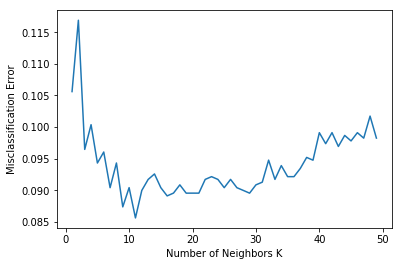

In [62]:
import matplotlib.pyplot as plt

plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()